# **Deutsch's Algorithm**

#### Deutsch's algorithm is one of the theoretical algorithms that shows how quantum computers can solve certain problems more efficiently than classical computers. Deutsch's algorithm solves this problem: Given a binary function $f$ that takes a single bit (0 or 1) as input and returns a single bit (0 or 1), $f:\{0,1\} \rightarrow \{0,1\}$, Deutsch's algorithm determins the function is either:
1. **Constant**: Returns the same value (0 or 1) for both inputs:
   - $f(0) = f(1) = 0$
   - $f(0) = f(1) = 1$
2. **Balanced**: Returns 0 for one input and 1 for the other:
   - $f(x) = x$
   - $f(x) = x\oplus\mathbb{1}$
#### Below, we go through all possible cases, explaining the required steps using the first example.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

## **Example 1:** Constant function $f(0) = f(1) = 0$

## **Step 1:** Initialize the qubits
#### Both qubits are first in the initial state $\ket 0$, as the default of Qiskit. The second qubit is flipped to $\ket 1$ giving the initial state as $| 10\rangle$ in little endian format
$$
|\phi_1\rangle =|10\rangle .
$$

In [ ]:
qc = QuantumCircuit(2,1, name = 'qc')

# Step 1
qc.x(1)
qc.barrier()

## **Step 2:** Apply Hadamard gates
#### we apply the Hadamard gate to both qubits, creating a superposition. This will result as
$$
|\phi_2\rangle = \frac{1}{2} \left( |00\rangle + |01\rangle - |10\rangle -|11\rangle \right).
$$

In [ ]:
#Step 2
qc.h(0)
qc.h(1)
qc.barrier()

## **Step 3:** Apply the oracle

#### The oracle $U_f$ is a quantum black box that implements the function $f(x)$. It performs a transformation on the second qubit depending on the value of $f(x)$ so that
$$
U_f|y,x\rangle = |y \oplus f(x), x\rangle
$$
#### where $x$ is the first qubit and also input of $f(x)$, $y$ is the second qubit and $\oplus$ is the $XOR$ operation. Considering two possible values for the constant function $f:\{0,1\} \rightarrow \{0,1\}$, the state of the system after applying oracle $U_f$ will be as
$$
|\phi_3\rangle = U_f|\phi_2\rangle \nonumber\\
= \frac{1}{2} \Big[\left(1-2f(0)\right)|00\rangle + \left(1-2f(1)\right)|01\rangle - \left(1-2f(0)\right)|10\rangle -\left(1-2f(1)\right)|11\rangle \Big].
$$
#### For the constant function, the oracle $U_f$ can be represented by Identity gates on both qubits when the constant value of the function is $f(0) = f(1) = 0$ and it flips the second qubit while the first qubit passes through an Identity gate when the constant value is $f(0) = f(1) = 1$.


In [ ]:
# Step 3: 
qc.id(0)
qc.id(1) 
qc.barrier()

## **Step 4:** Apply another Hadamard gate

#### After applying the oracle, we apply another Hadamard gate to the first qubit to bring it back from superposition. 
$$
|\phi_4\rangle = H_1|\phi_3\rangle \nonumber\\
= \big[1-f(0)-f(1)\big]\left(\frac{|0\rangle -|1\rangle}{\sqrt{2}}\right)|0\rangle +  \big[f(1)-f(0)\big]\left(\frac{|0\rangle -|1\rangle}{\sqrt{2}}\right)|1\rangle.
$$
#### According to this relation, after applying the Hadamard gate again, the first qubit will collapse to $|0\rangle$ for a constant function. For a balanced function, the first qubit will collapse to $|1\rangle$.

In [ ]:
# Step 4:
qc.h(0)
qc.barrier()


## **Step 5:** Measurement:

#### Finally, we measure the first qubit: 
- if the result is $|0 \rangle$, the function is **constant**,
- if the result is $|1 \rangle$ the function is **balanced**.

#### Classically, we have to measure the effect of $f(x)$ on both inputs to determine whether it is constant or balanced. But here in the quantum algorithm, as shown below, we make a measurement only on the 1rst qubit.

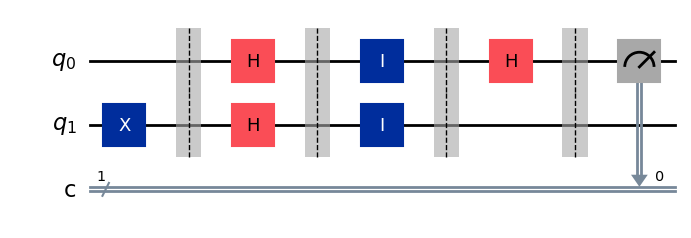

In [3]:
# Step 5
qc.measure(0,0)


qc.draw('mpl')



 Total counts are: {'0': 1000}


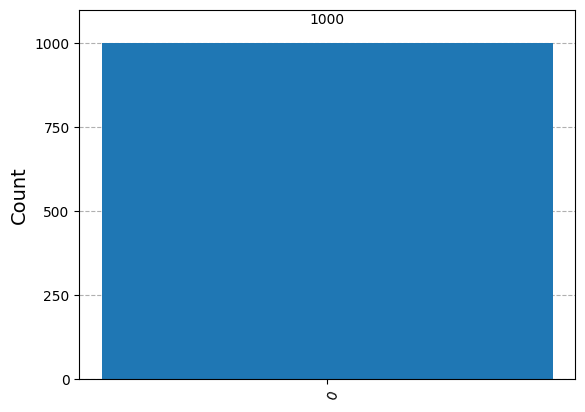

In [4]:
# initiate
estimator = Aer.get_backend('qasm_simulator')

#run
job = estimator.run(qc, shots = 1000)

# result
counts = job.result().get_counts(qc)

print("\n Total counts are:" , counts)

plot_histogram(counts)

#### The result of 1000 times  measurment confirms that the the function is a constant.

## **Example 2:** Constant function $f(0) = f(1) = 1$

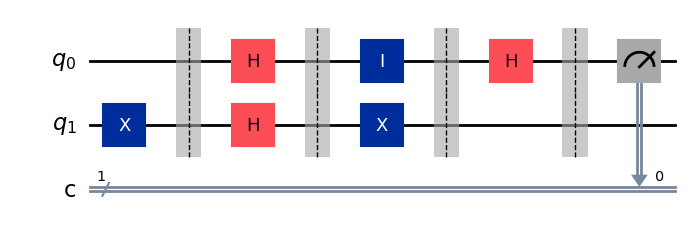

In [5]:
qc = QuantumCircuit(2,1, name = 'qc')

# Step 1
# flip the 2nd qubit to have |01> as our initial state
qc.x(1)
qc.barrier()

#Step 2: apply Hadamard gate to both qubits
qc.h(0)
qc.h(1)
qc.barrier()

# Step 3: pass the qubits through the oracle. The proper gates will be the Identity and X gates for the 1st and 2nd qubits respectively.
qc.id(0)
qc.x(1) 
qc.barrier()

# Step 4: apply Hadamard to the 1st qubit
qc.h(0)
qc.barrier()

# Step 5: measure the 1st qubit
qc.measure(0,0)


qc.draw('mpl')



 Total counts are: {'0': 1000}


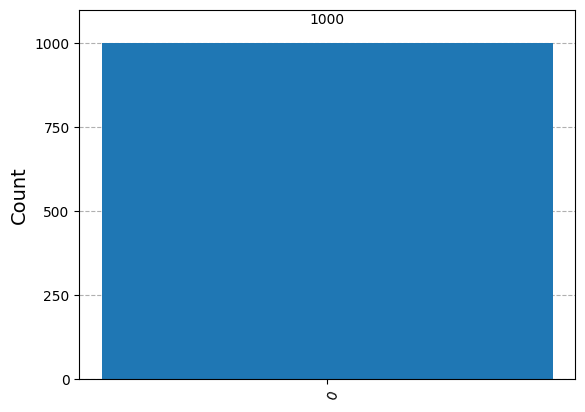

In [6]:
# initiate
estimator = Aer.get_backend('qasm_simulator')

#run
job = estimator.run(qc, shots = 1000)

# result
counts = job.result().get_counts(qc)

print("\n Total counts are:" , counts)

plot_histogram(counts)

#### Having 0 as the result for all measurements on the first qubit confirms that the function is constant.

## **Example 3:** Balanced function $f(x) = x$

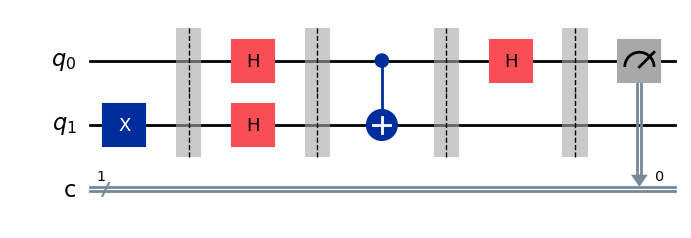

In [7]:
qc = QuantumCircuit(2,1, name = 'qc')

# Step 1
# flip the 2nd qubit to have |01> as our initial state
qc.x(1)
qc.barrier()

#Step 2: apply Hadamard gate to both qubits
qc.h(0)
qc.h(1)
qc.barrier()

# Step 3: pass the qubits through the oracle. The required gate to create this form of balanced function is the CNOT gate.
qc.cx(0,1) 
qc.barrier()

# Step 4: apply Hadamard to the 1st qubit
qc.h(0)
qc.barrier()

# Step 5: measure the 1st qubit
qc.measure(0,0)


qc.draw('mpl')


 Total counts are: {'1': 1000}


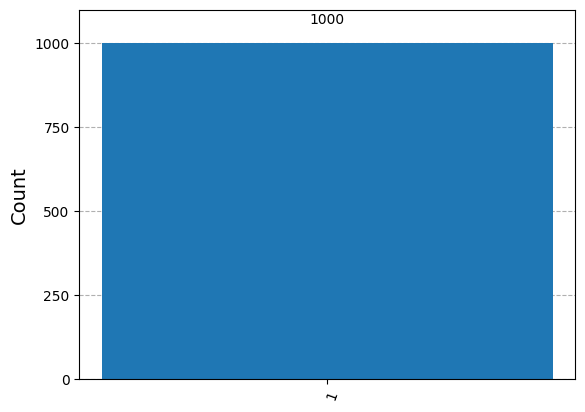

In [8]:
# initiate
estimator = Aer.get_backend('qasm_simulator')

#run
job = estimator.run(qc, shots = 1000)

# result
counts = job.result().get_counts(qc)

print("\n Total counts are:" , counts)

plot_histogram(counts)

#### This histogram confirms that all measurments on the 1rst qubit output to 1 which is a confirmation for having a balanced function.

## **Example 4:** Balanced function $f(x) = x\oplus \mathbb{1}$

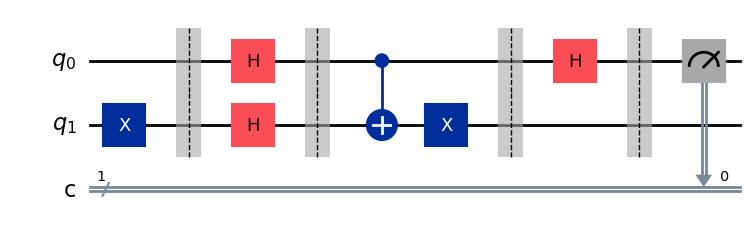

In [9]:
qc = QuantumCircuit(2,1, name = 'qc')

# Step 1
# flip the 2nd qubit to have |01> as our initial state
qc.x(1)
qc.barrier()

#Step 2: apply Hadamard gate to both qubits
qc.h(0)
qc.h(1)
qc.barrier()

# Step 3: pass the qubits through the oracle. First CNOT gate is applied followed by x gate to the 2nd qubit to create this form of balanced function
qc.cx(0,1)
qc.x(1) 
qc.barrier()

# Step 4: apply Hadamard to the 1st qubit
qc.h(0)
qc.barrier()

# Step 5: measure the 1st qubit
qc.measure(0,0)


qc.draw('mpl')


 Total counts are: {'1': 1000}


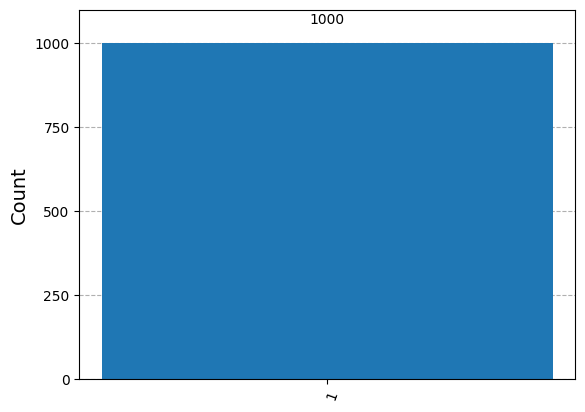

In [10]:
# initiate
estimator = Aer.get_backend('qasm_simulator')

#run
job = estimator.run(qc, shots = 1000)

# result
counts = job.result().get_counts(qc)

print("\n Total counts are:" , counts)

plot_histogram(counts)

#### The results of all measurements on the first qubit indicate that a balanced function has been applied to the qubits.